Hallo Till,

anbei einige der konvertierten bzw. geretteten Daten. Die Zeitreihen sind in einem 'Hydroinnova-ähnlichen' Format. Da die Sonden mehrmals umkonfiguriert wurden und das HVlog nicht synchron zum restlichen Log läuft, sind es hier jeweils zwei Files mit Zeitfenstern, welche die Daten auf >15 min bzw. > 10 min akkumulieren.

Für das file "data" sind die Daten in folgender Weise abgelegt
Filenummer, YYYY/MM/DD HH:MM:SS, Druck[mbar], Temperatur[°C], Luftfeuchte[%],-1(an der Stelle steht bei Hydroinnova Vbat), Rate[cps], rel.Zeitstempel[s]

Für das file "dataAdd" sind die Daten in folgender Weise abgelegt
Filenummer, YYYY/MM/DD HH:MM:SS, Hochspannung[V], TemperaturHVModul[°C], Batteriespannung[V], rel.Zeitstempel[s]

Die Daten sind direkte Konversionen der Rohdaten, ab und treten ein paar spikes auf, die kann man eventuell rausfiltern, aber ich sende euch jetzt hier die Daten so wie sie im Grunde von der Telemetrie gekommen wären.
Die Daten selbst haben einige Löcher, in der Regel wenn die Batterie nicht mehr genug Spannung geliefert hat, bzw. bevor wir den FTP Upload ausgeschaltet hatten. Bei allen Sensoren sind die Daten bis zum Ende der Kampagne bzw. bis über den Transport nach Marquardt vorhanden, bis auf Sensor 12, welcher etwa am 02.07. endet, eventuell trat dort das Problem mit der SD Karte auf.

Viele Grüße,

In [24]:
%matplotlib inline

In [28]:
# coding: utf-8

import glob
import os
import pandas as pd
import numpy as np
import shutil
from pathlib import Path
import os.path as path
import datetime as dt
import matplotlib.pyplot as plt

datadir = "/media/x/cosmicsense/data/fendt/crns/sty_reproc/20190925"
trgdir = "/media/x/cosmicsense/data/fendt/crns"
ids = [9,10,11,12,13]
start_time = "2019-11-01 00:00:00"

In [5]:
cols = ["rec_id", "datetime", "press1", "temp1", "relhum1", "volt", "cps", "reltime"]
cols2 = ["rec_id", "datetime", "hv", "temp_hv", "volt", "reltime"]

In [37]:
crns = {}
for i, id in enumerate(ids):
    print(id)
    fname = path.join(datadir, "N%ddata.dat" % id)
    df = pd.read_csv(fname, sep=",", comment="#", header=None, error_bad_lines=False, warn_bad_lines=True)
    df.columns = cols
    df.datetime = pd.to_datetime(df.datetime, format="%Y/%m/%d %H:%M:%S")
    df = df.set_index("datetime")
    df["datetime"] = df.index
    df["nsecs1"] = 1200
    df.loc[1:, "nsecs1"] = np.array((df.index[1:] - df.index[0:-1]).total_seconds())
    df["counts1"] = df.nsecs1 * df.cps
    df = df[["rec_id", "datetime", "press1", "temp1", "relhum1", "volt", "counts1", "nsecs1", "reltime"]]
    crns[id] = df
    outfile = path.join(trgdir, "%d/%d_CRNS_merge.txt" % (id, id))
    df.to_csv(outfile, sep="\t", index=False, date_format="%Y-%m-%d %H:%M:%S")    

9
10
11
12
13


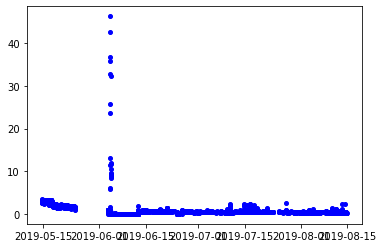

In [30]:
plt.plot(crns[9].index, crns[9].cps, "bo", ms=4, lw=0)

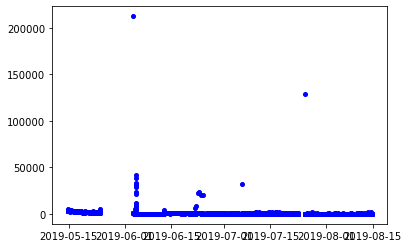

In [32]:
plt.plot(crns[9].index, crns[9].counts1, "bo", ms=4, lw=0)

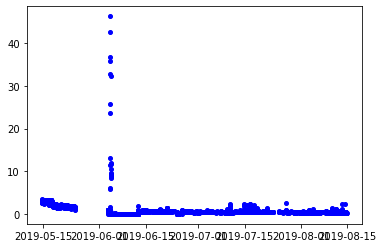

In [33]:
plt.plot(crns[9].index, crns[9].counts1/crns[9].nsecs1, "bo", ms=4, lw=0)